In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.optimize import fsolve
from math import *
from scipy.signal import argrelextrema
from imp import reload 

%matplotlib inline
#%matplotlib widget


import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=1.75, rc={"lines.linewidth": 4.0})

import pandas as pd

from matplotlib.patches import Rectangle

import scipy as sc
from scipy import optimize

#import pwlf
from scipy.spatial import distance

sns.set_palette("husl")

import time

In [2]:
N=4
x=np.random.uniform(size=N)
y=np.random.uniform(size=N)
points=np.concatenate([np.array(list(zip(x,y))), np.array([[0, 0], [0,1], [1,0 ], [1, 1]])])

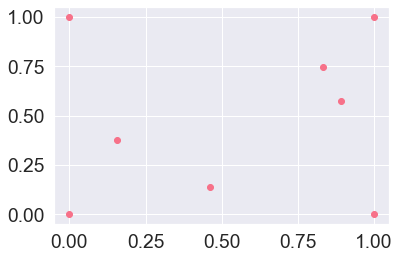

In [3]:
plt.scatter(points[:, 0], points[:, 1])

In [4]:
from scipy.spatial import Delaunay
tri = Delaunay(points) 

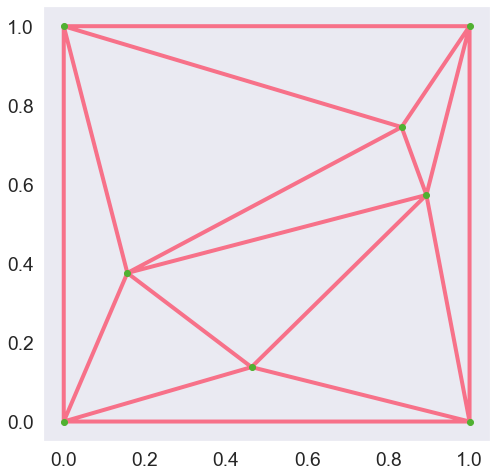

In [5]:
plt.figure(figsize=(8,8))
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.grid(False)

In [6]:
preedges=[]
for sim in tri.simplices:
    preedges.append([sim[0], sim[1]])
    preedges.append([sim[1], sim[2]])
    preedges.append([sim[2], sim[0]])

for edge in preedges:
    edge.sort()

edges = list(set(tuple(i) for i in preedges))
edges.sort()

In [7]:
trian=tri.simplices

for simpl in trian:
    simpl.sort()

#w=np.sqrt(np.random.uniform(size=len(edges)))
w=np.ones(len(edges))

In [8]:
w**2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

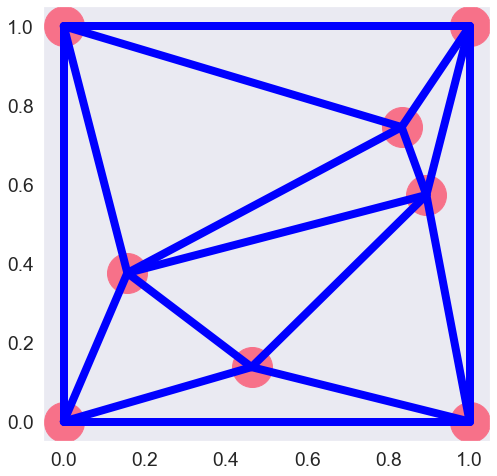

In [9]:
plt.figure(figsize=(8,8))
#plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o', markersize=40)

for i in range(len(edges)):
    plt.plot(points[edges[i], 0], points[edges[i], 1], 'blue', linewidth=8*(w**2)[i])
plt.grid(False)

In [10]:
B1=np.zeros((N+4, len(edges)))

for i in range(len(edges)):
    B1[edges[i][0],i]=1
    B1[edges[i][1],i]=-1

B2=np.zeros((len(edges), len(trian)))

for i in range(len(trian)):
    B2[edges.index((trian[i][0],trian[i][1])) ,i]=1
    B2[edges.index((trian[i][1],trian[i][2])) ,i]=1
    B2[edges.index((trian[i][0],trian[i][2])) ,i]=-1


B1, B2

(array([[ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0., -1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  1.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.,  0.,
          1.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0., -1.,  0.,
         -1.,  0.,  1.,  0.],
        [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,
          0., -1.,  0.,  1.],
        [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
          0.,  0., -1., -1.]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1

In [11]:
W=np.diag(w)
Dt=np.diag(np.dot(B2.T, np.diag(np.dot(W, W))))
L1W=np.dot(W, np.dot(B1.T, np.dot(B1, W)))+np.dot(W, np.dot(np.dot(B2, B2.T), W))
#L1W=np.dot(W, np.dot(B1.T, np.dot(B1, W)))+np.dot(B2, np.dot(Dt, B2.T))

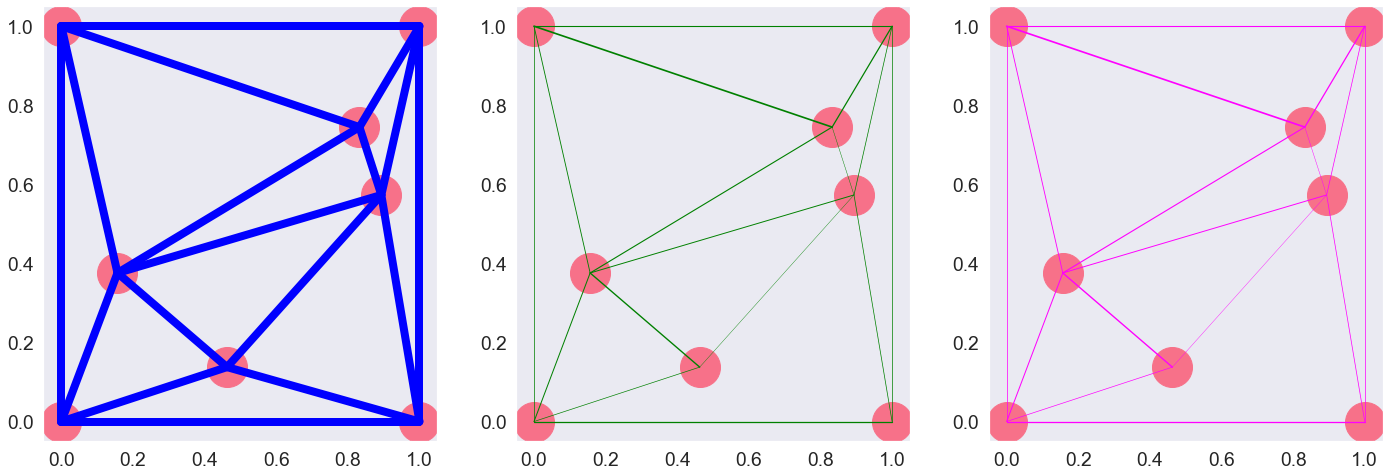

In [12]:
eigs=np.linalg.eig(L1W)
smallest=eigs[1][np.argmin(eigs[0])]

plt.subplots(1, 3, figsize=(24,8))
plt.subplot(1,3,1)
#plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o', markersize=40)

for i in range(len(edges)):
    plt.plot(points[edges[i], 0], points[edges[i], 1], 'blue', linewidth=8*(w**2)[i])
plt.grid(False)

plt.subplot(1,3,2)
#plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o', markersize=40)

for i in range(len(edges)):
    plt.plot(points[edges[i], 0], points[edges[i], 1], 'green', linewidth=4*1./(w**2)[i]*smallest[i])
plt.grid(False)


L1W2=np.dot(W, np.dot(B1.T, np.dot(B1, W)))+np.dot(B2, np.dot(Dt, B2.T))
eigs2=np.linalg.eig(L1W2)
smallest2=eigs2[1][np.argmin(eigs2[0])]

plt.subplot(1,3,3)
#plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o', markersize=40)

for i in range(len(edges)):
    plt.plot(points[edges[i], 0], points[edges[i], 1], 'magenta', linewidth=4*1./(w**2)[i]*smallest2[i])
plt.grid(False)

In [13]:
import random
from copy import deepcopy

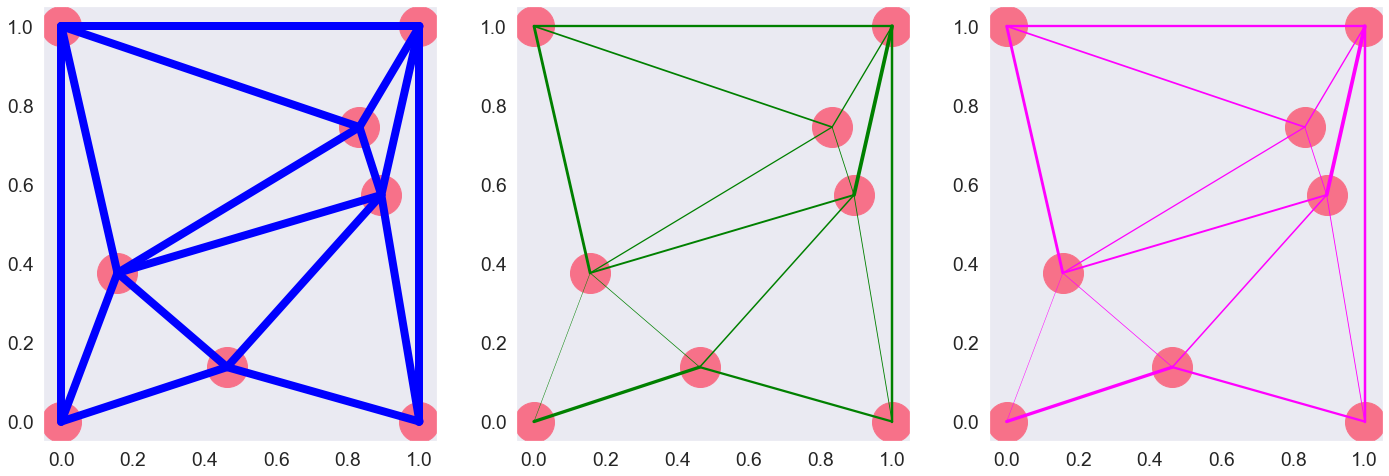

In [14]:
edges2=deepcopy(edges)
trian2=[]
expl=random.randrange(len(edges2))

for j in range(len(trian)):
    if edges2[expl] in [(trian[j][0],trian[j][1]), (trian[j][1],trian[j][2]), (trian[j][0],trian[j][2])]:
        pass
    else:
        trian2.append(trian[j])

edges2.pop(expl)

B12=np.zeros((N+4, len(edges2)))

for i in range(len(edges2)):
    B12[edges2[i][0],i]=1
    B12[edges2[i][1],i]=-1

B22=np.zeros((len(edges2), len(trian)))

for i in range(len(trian2)):
    B22[edges2.index((trian2[i][0],trian2[i][1])) ,i]=1
    B22[edges2.index((trian2[i][1],trian2[i][2])) ,i]=1
    B22[edges2.index((trian2[i][0],trian2[i][2])) ,i]=-1
    
#w=np.sqrt(np.random.uniform(size=len(edges)))
w2=np.delete(w, expl)
W2=np.diag(w2)
Dt2=np.diag(np.dot(B22.T, np.diag(np.dot(W2, W2))))
L1W2=np.dot(W2, np.dot(B12.T, np.dot(B12, W2)))+np.dot(W2, np.dot(np.dot(B22, B22.T), W2))
#L1W=np.dot(W, np.dot(B1.T, np.dot(B1, W)))+np.dot(B2, np.dot(Dt, B2.T))


eigs=np.linalg.eig(L1W2)
smallest=eigs[1][np.argmin(eigs[0])]

plt.subplots(1, 3, figsize=(24,8))
plt.subplot(1,3,1)
#plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o', markersize=40)

for i in range(len(edges2)):
    plt.plot(points[edges2[i], 0], points[edges2[i], 1], 'blue', linewidth=8*(w2**2)[i])
plt.grid(False)

plt.subplot(1,3,2)
#plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o', markersize=40)

for i in range(len(edges2)):
    plt.plot(points[edges2[i], 0], points[edges2[i], 1], 'green', linewidth=8./(w**2)[i]*smallest[i])
plt.grid(False)


L1W22=np.dot(W2, np.dot(B12.T, np.dot(B12, W2)))+np.dot(B22, np.dot(Dt2, B22.T))
eigs2=np.linalg.eig(L1W22)
smallest2=eigs2[1][np.argmin(eigs2[0])]

plt.subplot(1,3,3)
#plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o', markersize=40)

for i in range(len(edges2)):
    plt.plot(points[edges2[i], 0], points[edges2[i], 1], 'magenta', linewidth=8./(w**2)[i]*smallest2[i])
plt.grid(False)

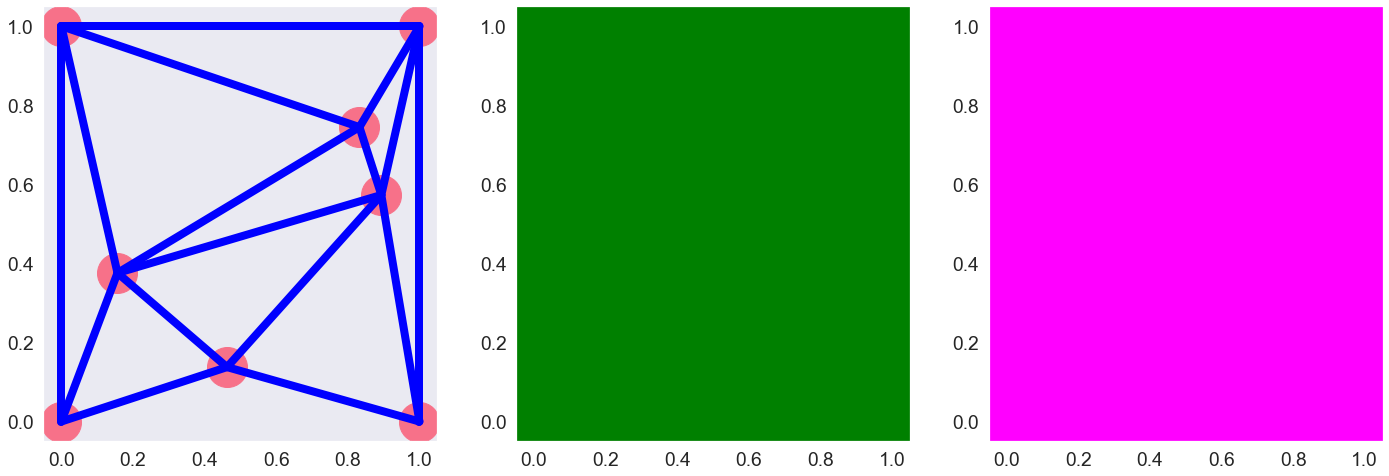

In [15]:
W2=np.diag(w2)
Dt2=np.diag(np.dot(B22.T, np.diag(np.dot(W2, W2))))
L1W2=np.dot(W2, np.dot(B12.T, np.dot(B12, W2)))+np.dot(W2, np.dot(np.dot(B22, B22.T), W2))
#L1W=np.dot(W, np.dot(B1.T, np.dot(B1, W)))+np.dot(B2, np.dot(Dt, B2.T))


eigs=np.linalg.eig(L1W2)
smallest=eigs[1][np.argmin(eigs[0])]

plt.subplots(1, 3, figsize=(24,8))
plt.subplot(1,3,1)
#plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o', markersize=40)

for i in range(len(edges2)):
    plt.plot(points[edges2[i], 0], points[edges2[i], 1], 'blue', linewidth=8*(w2**2)[i])
plt.grid(False)

plt.subplot(1,3,2)
#plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o', markersize=40)

for i in range(len(edges2)):
    plt.plot(points[edges2[i], 0], points[edges2[i], 1], 'green', linewidth=1./(4./(w**2)[i]*smallest[i]))
plt.grid(False)


L1W22=np.dot(W2, np.dot(B12.T, np.dot(B12, W2)))+np.dot(B22, np.dot(Dt2, B22.T))
eigs2=np.linalg.eig(L1W22)
smallest2=eigs2[1][np.argmin(eigs2[0])]

plt.subplot(1,3,3)
#plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o', markersize=40)

for i in range(len(edges2)):
    plt.plot(points[edges2[i], 0], points[edges2[i], 1], 'magenta', linewidth=1./(4./(w**2)[i]*smallest2[i]))
plt.grid(False)